In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Set display options to show all columns
pd.set_option('display.max_columns', None)

CWD = os.getcwd()
print(f'CWD: {CWD}')

CWD: /data_analysis/Insurance/src


In [3]:
ROOT = os.path.dirname(CWD)
PATH = os.path.join(ROOT, 'data', 'train.csv')

train = pd.read_csv(PATH, low_memory=False, na_values='?', index_col='id')
train.sample(5)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1267353,Male,23,1,15.0,0,< 1 Year,No,48354.0,152.0,255,0
1667514,Female,22,1,11.0,1,< 1 Year,No,34488.0,160.0,234,0
1766581,Female,45,1,28.0,1,1-2 Year,No,51041.0,124.0,57,0
2875386,Male,36,1,28.0,1,1-2 Year,No,33123.0,152.0,232,0
3424528,Male,24,1,27.0,1,< 1 Year,No,29969.0,152.0,80,0


In [5]:
train.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [6]:
target = 'Response'
num_cols = ['Age', 'Annual_Premium', 'Vintage']
cat_cols = ['Gender', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Damage', 'Policy_Sales_Channel']
ordinal_cols = ['Vehicle_Age']

train[cat_cols] = train[cat_cols].astype('category')
train[ordinal_cols] = train[ordinal_cols].astype('category')
train.describe(include='all')

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,11504798,1.150480e+07,11504798.0,11504798.0,11504798.0,11504798,11504798,1.150480e+07,11504798.0,1.150480e+07,1.150480e+07
unique,2,NaN,2.0,54.0,2.0,3,2,NaN,152.0,NaN,NaN
top,Male,NaN,1.0,28.0,0.0,1-2 Year,Yes,NaN,152.0,NaN,NaN
freq,6228134,NaN,11482041.0,3451062.0,6178116.0,5982678,5783229,NaN,4166183.0,NaN,NaN
mean,NaN,3.838356e+01,NaN,NaN,NaN,NaN,NaN,3.046137e+04,NaN,1.638977e+02,1.229973e-01
std,NaN,1.499346e+01,NaN,NaN,NaN,NaN,NaN,1.645475e+04,NaN,7.997953e+01,3.284341e-01
min,NaN,2.000000e+01,NaN,NaN,NaN,NaN,NaN,2.630000e+03,NaN,1.000000e+01,0.000000e+00
25%,NaN,2.400000e+01,NaN,NaN,NaN,NaN,NaN,2.527700e+04,NaN,9.900000e+01,0.000000e+00
50%,NaN,3.600000e+01,NaN,NaN,NaN,NaN,NaN,3.182400e+04,NaN,1.660000e+02,0.000000e+00
75%,NaN,4.900000e+01,NaN,NaN,NaN,NaN,NaN,3.945100e+04,NaN,2.320000e+02,0.000000e+00


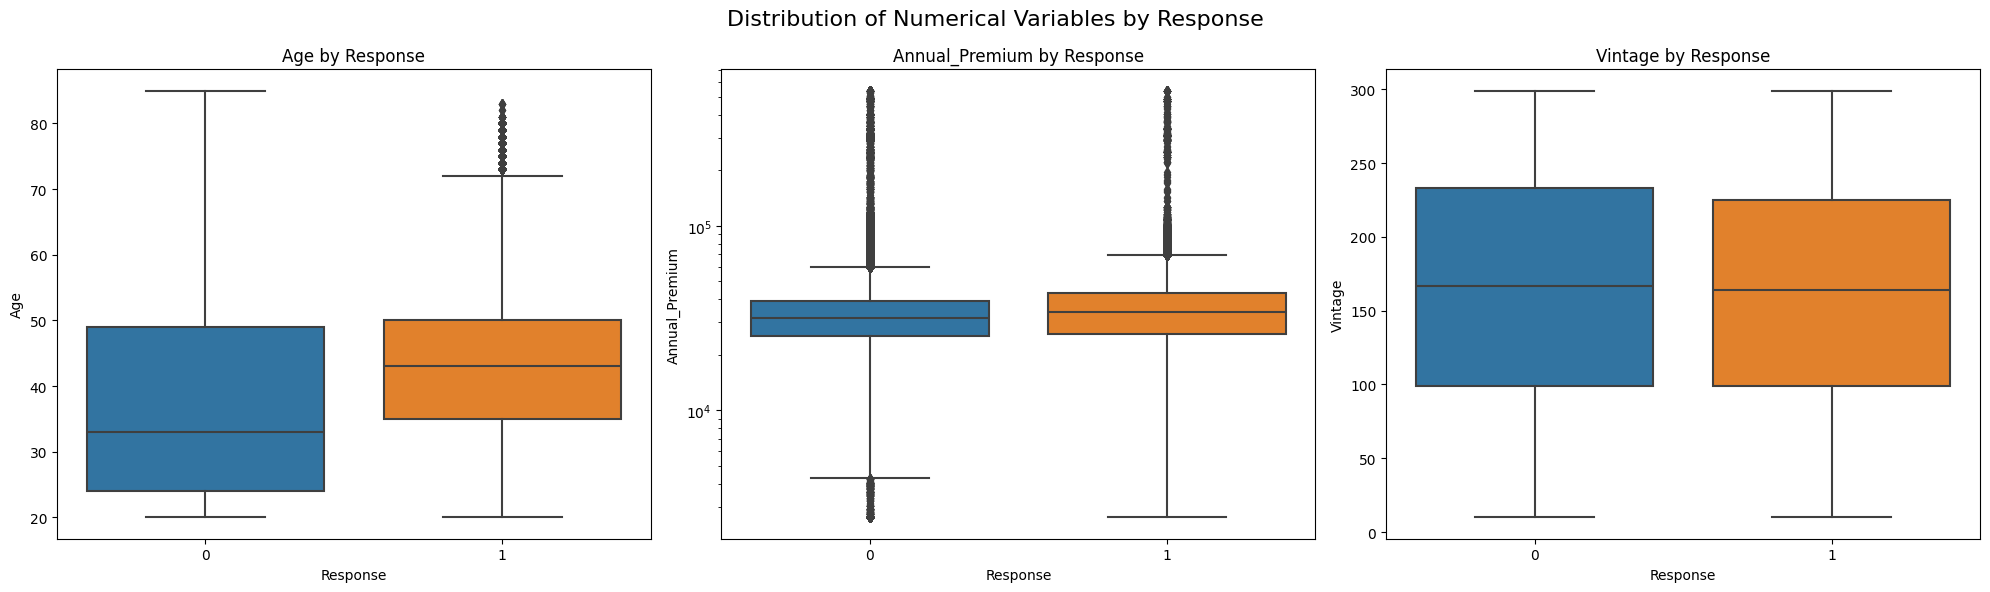

In [8]:
# Create the figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Distribution of Numerical Variables by Response', fontsize=16)

# Create a box plot for each numerical column
for i, col in enumerate(num_cols):
    sns.boxplot(x='Response', y=col, data=train, ax=axes[i])
    axes[i].set_title(f'{col} by Response')
    axes[i].set_xlabel('Response')
    axes[i].set_ylabel(col)

# Adjust layout and display the plot
axes[1].set_yscale('log')
plt.tight_layout()
plt.show()

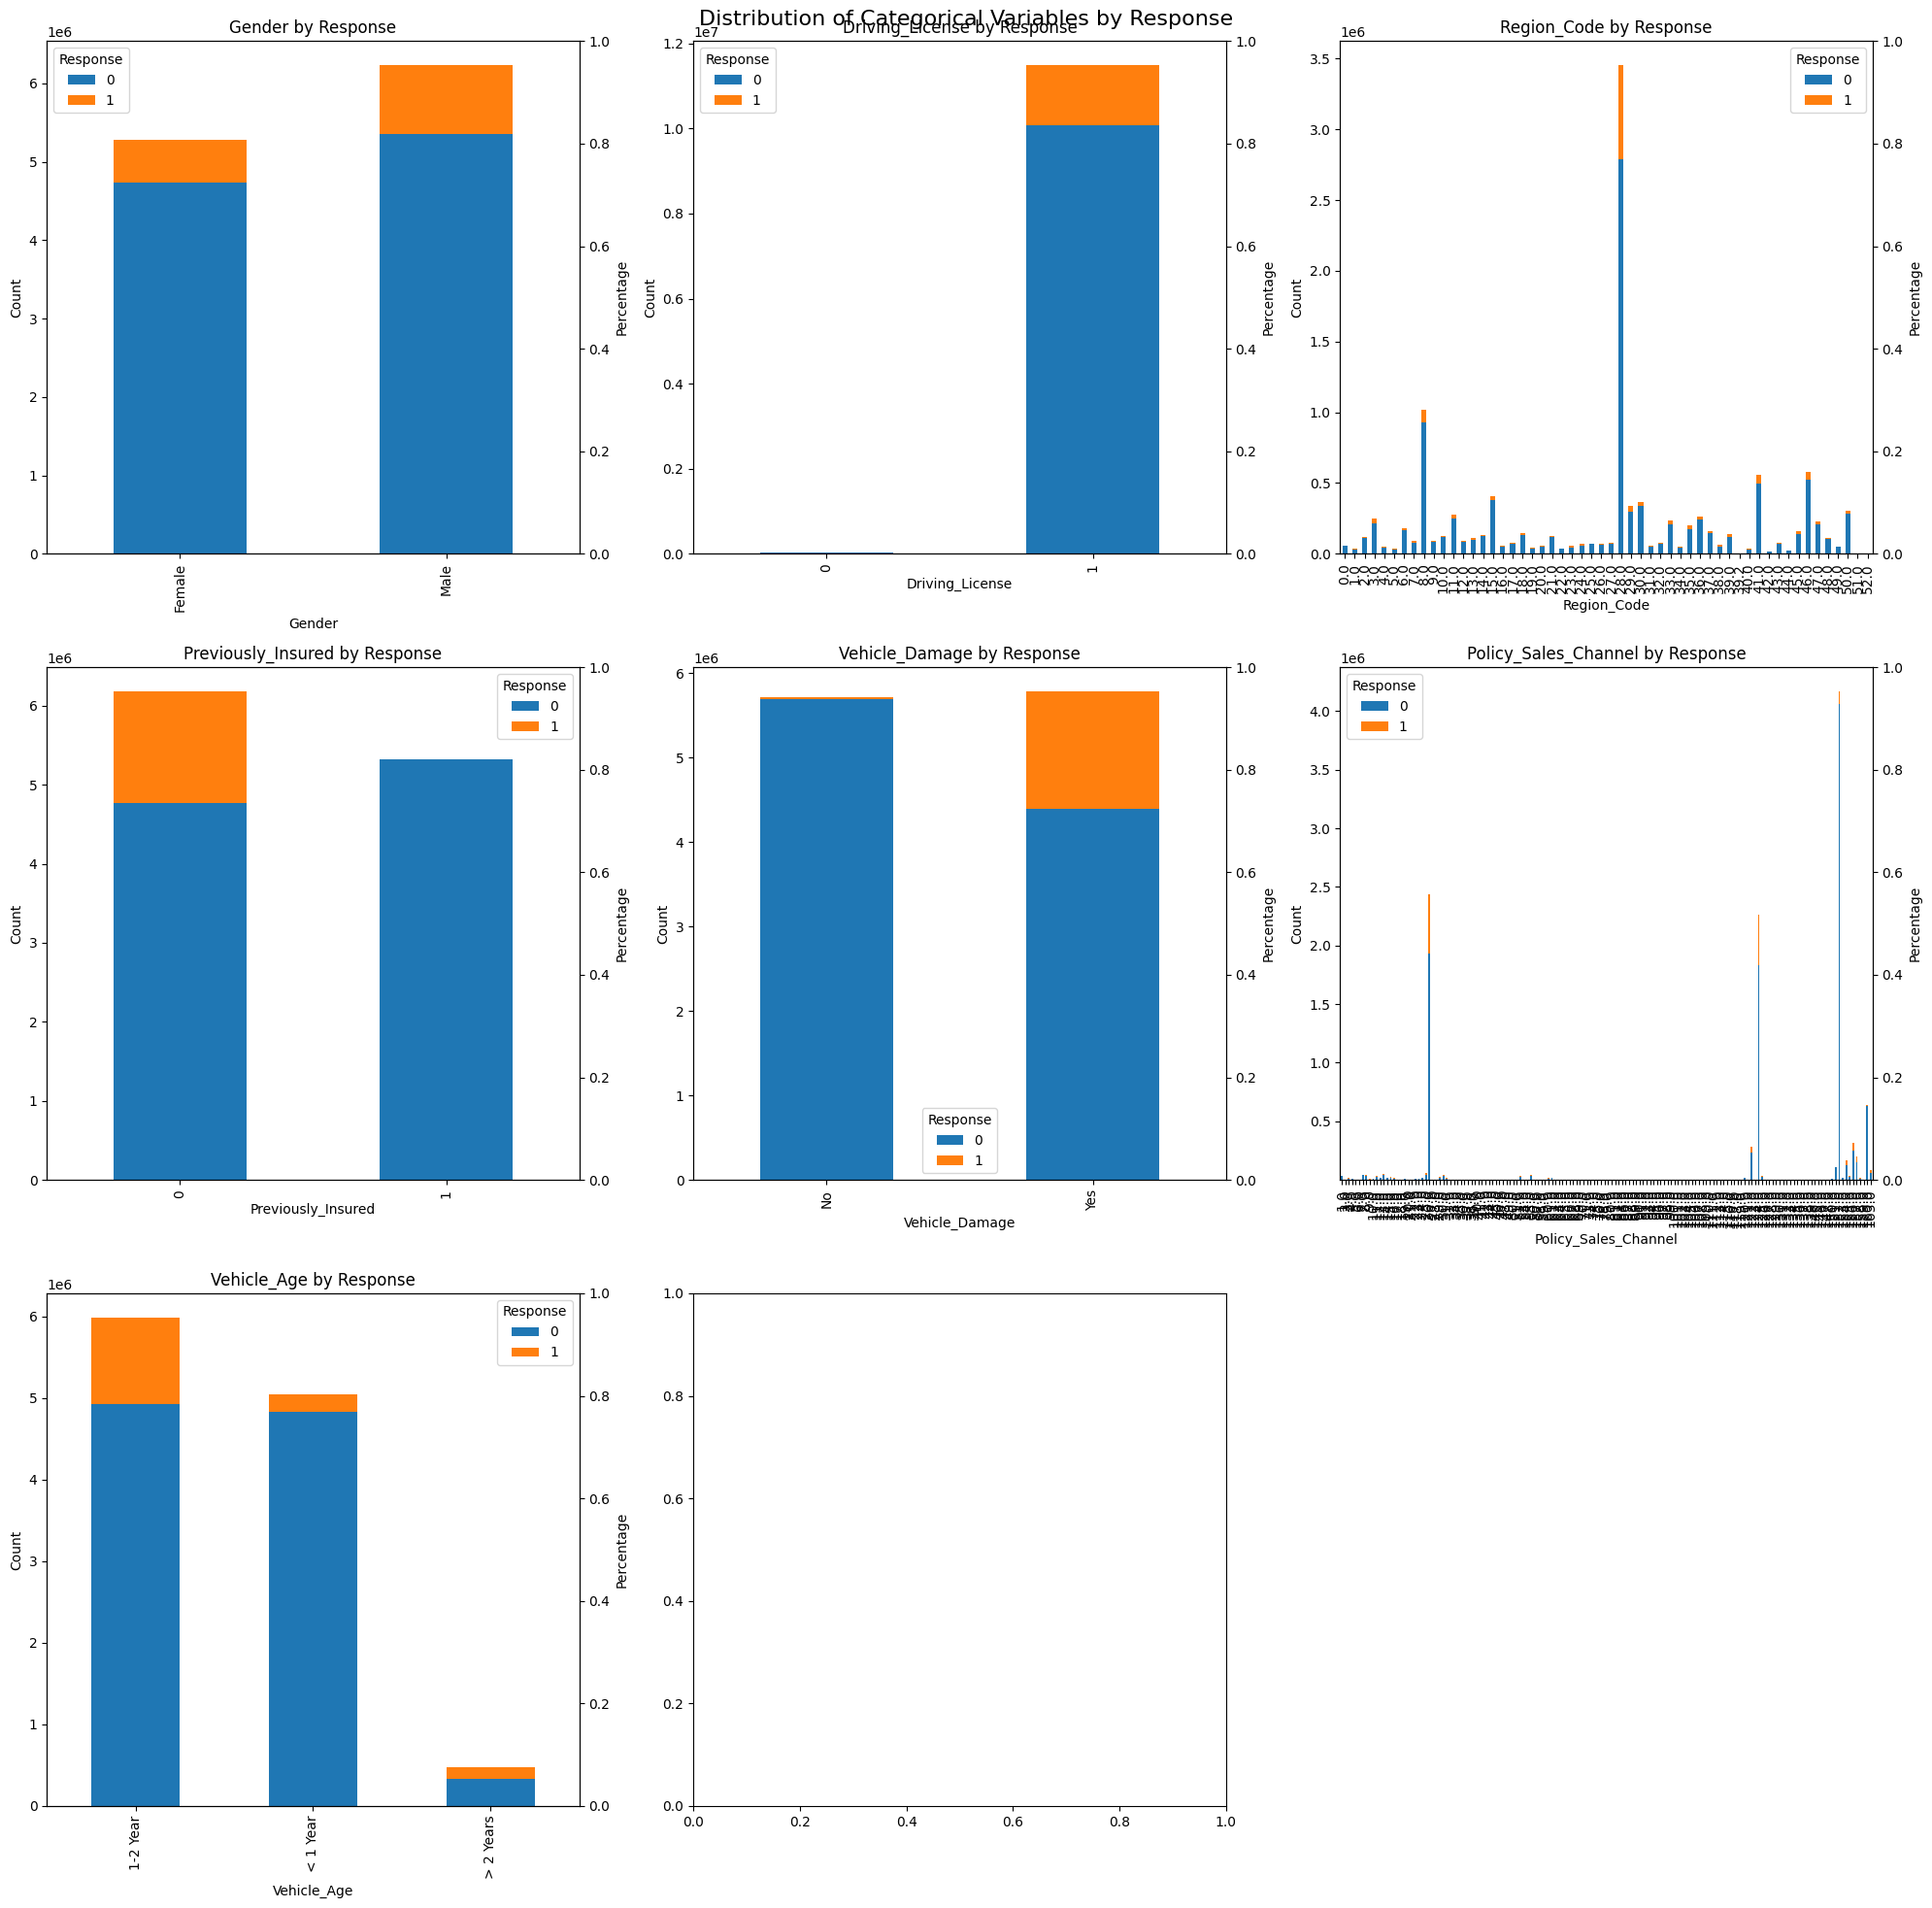

In [16]:
# Combine cat_cols and ordinal_cols
combined_cols = ['Gender', 'Driving_License', 'Region_Code', 'Previously_Insured', 
                 'Vehicle_Damage', 'Policy_Sales_Channel', 'Vehicle_Age']

# Create the figure and subplots
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
fig.suptitle('Distribution of Categorical Variables by Response', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create a stacked bar chart for each column
for i, col in enumerate(combined_cols):
    # Get value counts and percentages
    counts = train.groupby([col, 'Response']).size().unstack(fill_value=0)
    percentages = counts.div(counts.sum(axis=1), axis=0) * 100

    # Plot counts
    counts.plot(kind='bar', stacked=True, ax=axes[i])
    axes[i].set_title(f'{col} by Response')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

    # Create a twin axis for percentages
    ax2 = axes[i].twinx()
    ax2.set_ylabel('Percentage')

# Remove the extra subplot
axes[-1].axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()